# Algorithm and Experiments Report

In [88]:
import utils as ul
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from perceptron import Perceptron

pd.options.mode.chained_assignment = None  # default='warn'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 4 - The Perceptron Algorithm and its Variants

For this question, you will experiment with the Perceptron algorithm and some variants on
a data set.

### 4.1 - The task and data

In [4]:
labels = {True:1, False:-1}

x_dev, y_dev, data_dev = ul.load_data(list(labels.values()), dir=r'data/diabetes.dev.csv')
x_train, y_train, data_train = ul.load_data(list(labels.values()), dir=r'data/diabetes.train.csv')
x_test, y_test, data_test = ul.load_data(list(labels.values()), dir=r'data/diabetes.test.csv')

### 4.2 & 4.3 - Algorithms and Experiments

You will implement several variants of the Perceptron algorithm. Note that each variant has
different hyper-parameters, as described below. Use 5-fold cross-validation to identify the
best hyper-parameters as you did in the previous homework. To help with this, we have split
the training set into five parts train0.data.csv–train4.data.csv in the folder CVSplits.

In [81]:
epochs_a, epochs_b = 10, 20
k_datasets = [ul.load_data(list(labels.values()), dir=f'./data/CVSplits/train{k}.csv')[2] for k in range(5)]

#### 1. Simple Perceptron: 
Implement the simple batch version of Perceptron as described in the class. Use a fixed learning rate η chosen from {1, 0.1, 0.01}. An update will be performed on an example (x, y) if y(wT x + b) < 0 as:
$$
\textbf{w} \leftarrow \textbf{w} + \eta y \textbf{x}
$$,
$$
b \leftarrow b + \eta y
$$.
$\textbf{Hyper-parameter:}$ Learning rate $\eta\in\{1,0.1,0.01\}$
Two things bear additional explanation. 

In [77]:
l_rates = [1, 0.1, 0.01]
hps = ul.get_hp_combs(l_rates, [0]).tolist() # hyperameter combinations

baseline_update_func = Perceptron.update_base_fnc # Simple Perceptron
lr_update_func = Perceptron.lr_base_fnc # lr does not change

##### 1.a - Below is the FF-CV experiment for the Simple Perceptron.

In [80]:
cvv_stats, cvv_acc = ul.five_fold_CV(
    k_datasets, labels, hyperparams=hps, e=epochs_a, 
    update_fnc=baseline_update_func, lr_fnc=lr_update_func
    )

print("Accuracy statistics from five-fold cross-validation:\n")
print("learning rate 'r' \t| five-fold mean | five-fold std")
for (r, mu), (mean, std) in cvv_stats.items():
    print(f"r={r}\t\t\t| {np.round(mean, 3)}\t\t | {np.round(std, 3)}")


Accuracy statistics from five-fold cross-validation:

learning rate 'r' 	| five-fold mean | five-fold std
r=1.0			| 0.543		 | 0.09
r=0.1			| 0.641		 | 0.056
r=0.01			| 0.656		 | 0.053


Results: I ran the FF-CV experiment multiple times and r=0.01 consistently had the best mean accuracies and lowest standard deviation. For the report, mean and std at r=0.01 were 0.656 and 0.053 respectively.

##### 1.b - The cross-validation accuracy for the best hyperparameter 

Results: As stated above, the FF-CV accuracy for the best hyperparameters was 65.6%.

##### 1.c-1.e - The total number of updates the learning algorithm performs on the training set

In [95]:
r = 0.01
model = Perceptron(labels)
update_count, train_acc_ls = model.train(data_train, epochs=epochs_b, r=r, dev_data=data_dev)

# Getting the classifier with the best accuracy.
(best_idx, (best_acc, best_classifier)) = max(train_acc_ls.items(), key=lambda x : x[1][0])
best_model = Perceptron(labels, model=(best_classifier, None))
best_test_acc = round(best_model.calc_acc(x_test, y_test),2)

print(f"1.c - The total number of updates performed by the simple perceptron at r=0.01: {update_count}.")
print(f"1.d - The maximum accuracy on the dev dataset: {best_acc}. Obtained by classifier derived at epoch: {best_idx}.")
print(f"1.e - The test accuracy by the classifier w/ the best dev dataset performance was {best_test_acc}.")

1.c - The total number of updates performed by the simple perceptron at r=0.01: 6034.
1.d - The maximum accuracy on the dev dataset: 0.72. Obtained by classifier derived at epoch: 16.
1.e - The test accuracy by the classifier w/ the best dev dataset performance was 0.76.


##### 1.f - Training Plot

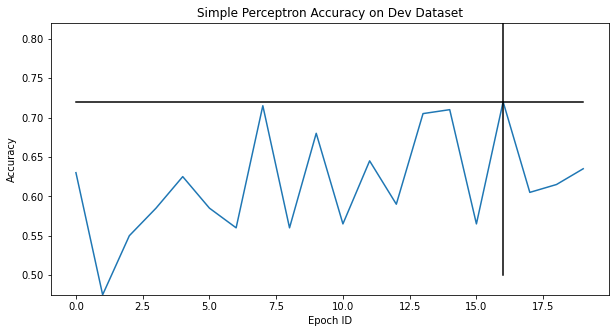

In [104]:
# Need to run the section above before running this block
dev_accs = np.array([acc for _, (acc, _) in train_acc_ls.items()])
x_accs = np.arange(epochs_b)
fig = plt.figure(figsize=[10, 5])

plt.plot(x_accs, dev_accs); plt.title("Simple Perceptron Accuracy on Dev Dataset")
plt.xlabel("Epoch ID"); plt.ylabel("Accuracy")
plt.ylim([min(dev_accs), max(dev_accs)+0.1])
plt.plot(x_accs, np.ones_like(x_accs)*best_acc, 'k')
plt.plot(np.ones_like(x_accs)*best_idx, np.linspace(0.5, 1, epochs_b), 'k')
plt.show()

#### 2. Decaying the learning rate  

In [185]:
l_rates = [1, 0.1, 0.01]
hps = ul.get_hp_combs(l_rates, [0]).tolist() # hyperameter combinations

baseline_update_func = Perceptron.update_base_fnc # Simple Perceptron
lr_update_func = Perceptron.lr_decay_fnc # Use lr decay

##### 2.a - Below is the FF-CV experiment for the Simple Perceptron w/ decaying learning rate.

In [190]:
cvv_stats, cvv_acc = ul.five_fold_CV(
    k_datasets, labels, hyperparams=hps, e=epochs_a, 
    update_fnc=baseline_update_func, lr_fnc=lr_update_func
    )

print("Accuracy statistics from five-fold cross-validation:\n")
print("learning rate 'r' \t| five-fold mean | five-fold std")
for (r, mu), (mean, std) in cvv_stats.items():
    print(f"r={r}\t\t\t| {np.round(mean, 3)}\t\t | {np.round(std, 3)}")


Accuracy statistics from five-fold cross-validation:

learning rate 'r' 	| five-fold mean | five-fold std
r=1.0			| 0.649		 | 0.046
r=0.1			| 0.636		 | 0.055
r=0.01			| 0.665		 | 0.028


Results: I ran the FF-CV experiment multiple times and got the best results w/ r=0.01 since it consistently had the best mean accuracies and lowest standard deviation. For the report, mean and std at r=0.01 were 0.665 and 0.028 respectively.

##### 2.b - The cross-validation accuracy for the best hyperparameter 

Results: As stated above, the FF-CV accuracy for the best hyperparameters was 66.5%.

##### 2.c-2.e - The total number of updates the learning algorithm performs on the training set

In [194]:
r = 0.01
model = Perceptron(labels, lr_fnc=lr_update_func)
update_count, train_acc_ls = model.train(data_train, epochs=epochs_b, r=r, dev_data=data_dev)

# Getting the classifier with the best accuracy.
(best_idx, (best_acc, best_classifier)) = max(train_acc_ls.items(), key=lambda x : x[1][0])
best_model = Perceptron(labels, model=(best_classifier, None))
best_test_acc = round(best_model.calc_acc(x_test, y_test),2)

print(f"2.c - The total number of updates performed by the simple perceptron at r=0.01: {update_count}.")
print(f"2.d - The maximum accuracy on the dev dataset: {best_acc}. Obtained by classifier derived at epoch: {best_idx}.")
print(f"2.e - The test accuracy by the classifier w/ the best dev dataset performance was {best_test_acc}.")

2.c - The total number of updates performed by the simple perceptron at r=0.01: 4738.
2.d - The maximum accuracy on the dev dataset: 0.745. Obtained by classifier derived at epoch: 6.
2.e - The test accuracy by the classifier w/ the best dev dataset performance was 0.73.


##### 2.f - Training Plot

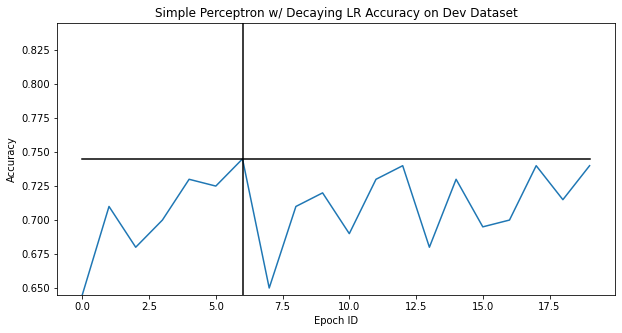

In [195]:
# Need to run the section above before running this block
dev_accs = np.array([acc for _, (acc, _) in train_acc_ls.items()])
x_accs = np.arange(epochs_b)
fig = plt.figure(figsize=[10, 5])

plt.plot(x_accs, dev_accs); plt.title("Simple Perceptron w/ Decaying LR Accuracy on Dev Dataset")
plt.xlabel("Epoch ID"); plt.ylabel("Accuracy")
plt.ylim([min(dev_accs), max(dev_accs)+0.1])
plt.plot(x_accs, np.ones_like(x_accs)*best_acc, 'k')
plt.plot(np.ones_like(x_accs)*best_idx, np.linspace(0.5, 1, epochs_b), 'k')
plt.show()

#### 3. Margin Perceptron

In [196]:
l_rates = [1, 0.1, 0.01]; mu = [1, 0.1, 0.01]
hps = ul.get_hp_combs(l_rates, mu).tolist() # hyperameter combinations

margin_update_func = Perceptron.update_margin_fnc # Simple Perceptron
lr_update_func = Perceptron.lr_decay_fnc

##### 3.a - Below is the FF-CV experiment for the Margin Perceptron.

In [199]:
cvv_stats, cvv_acc = ul.five_fold_CV(
    k_datasets, labels, hyperparams=hps, e=epochs_a, 
    update_fnc=margin_update_func, lr_fnc=lr_update_func
    )

print("Accuracy statistics from five-fold cross-validation:\n")
print("learning rate 'r' \t| mu\t\t| five-fold mean | five-fold std")
for (r, mu), (mean, std) in cvv_stats.items():
    print(f"r={r}\t\t\t| mu={mu}\t| {np.round(mean, 3)}\t\t | {np.round(std, 3)}")


Accuracy statistics from five-fold cross-validation:

learning rate 'r' 	| mu		| five-fold mean | five-fold std
r=1.0			| mu=1.0	| 0.664		 | 0.036
r=0.1			| mu=1.0	| 0.659		 | 0.054
r=0.01			| mu=1.0	| 0.648		 | 0.054
r=1.0			| mu=0.1	| 0.684		 | 0.031
r=0.1			| mu=0.1	| 0.657		 | 0.037
r=0.01			| mu=0.1	| 0.663		 | 0.043
r=1.0			| mu=0.01	| 0.657		 | 0.032
r=0.1			| mu=0.01	| 0.677		 | 0.029
r=0.01			| mu=0.01	| 0.647		 | 0.048


Results: I ran the FF-CV experiment a few times and hyperparameters r=0.1 and mu = 0.01 consistently had the best mean accuracies and lowest standard deviation. For the report, mean and std at the best hyperparameters were 0.677 and 0.029 respectively.

##### 3.b - The cross-validation accuracy for the best hyperparameter 

Results: As stated above, the FF-CV accuracy for the best hyperparameters was 67.7%.

##### 3.c-3.e - The total number of updates the learning algorithm performs on the training set

In [201]:
r = 0.1; mu = 0.01
model = Perceptron(labels, update_fnc=margin_update_func, lr_fnc=lr_update_func)
update_count, train_acc_ls = model.train(data_train, epochs=epochs_b, r=r, mu=mu, dev_data=data_dev)

# Getting the classifier with the best accuracy.
(best_idx, (best_acc, best_classifier)) = max(train_acc_ls.items(), key=lambda x : x[1][0])
best_model = Perceptron(labels, model=(best_classifier, None))
best_test_acc = round(best_model.calc_acc(x_test, y_test),2)

print(f"3.c - The total number of updates performed by the margin perceptron at r=0.1 and mu=0.01: {update_count}.")
print(f"3.d - The maximum accuracy on the dev dataset: {best_acc}. Obtained by classifier derived at epoch: {best_idx}.")
print(f"3.e - The test accuracy by the classifier w/ the best dev dataset performance was {best_test_acc}.")

3.c - The total number of updates performed by the margin perceptron at r=0.1 and mu=0.01: 5082.
3.d - The maximum accuracy on the dev dataset: 0.75. Obtained by classifier derived at epoch: 18.
3.e - The test accuracy by the classifier w/ the best dev dataset performance was 0.71.


##### 3.f - Training Plot

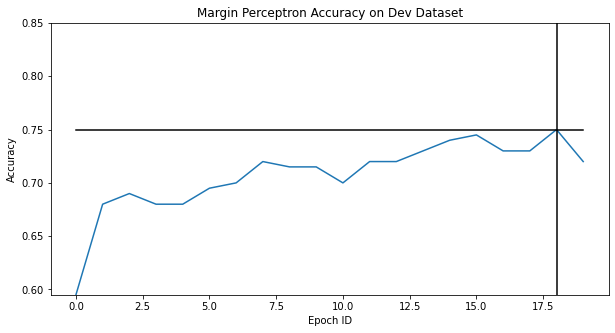

In [202]:
# Need to run the section above before running this block
dev_accs = np.array([acc for _, (acc, _) in train_acc_ls.items()])
x_accs = np.arange(epochs_b)
fig = plt.figure(figsize=[10, 5])

plt.plot(x_accs, dev_accs); plt.title("Margin Perceptron Accuracy on Dev Dataset")
plt.xlabel("Epoch ID"); plt.ylabel("Accuracy")
plt.ylim([min(dev_accs), max(dev_accs)+0.1])
plt.plot(x_accs, np.ones_like(x_accs)*best_acc, 'k')
plt.plot(np.ones_like(x_accs)*best_idx, np.linspace(0.5, 1, epochs_b), 'k')
plt.show()

#### 4. Averaged Perceptron 

In [203]:
l_rates = [1, 0.1, 0.01]
hps = ul.get_hp_combs(l_rates, [0]).tolist() # hyperameter combinations

averaged_update_func = Perceptron.update_averaged_fnc # averaged Perceptron
lr_update_func = Perceptron.lr_decay_fnc # using decaying lr

##### 4.a - Below is the FF-CV experiment for the Averaged Perceptron.

In [204]:
cvv_stats, cvv_acc = ul.five_fold_CV(
    k_datasets, labels, hyperparams=hps, e=epochs_b, 
    update_fnc=averaged_update_func, lr_fnc=lr_update_func
    )

print("Accuracy statistics from five-fold cross-validation:\n")
print("learning rate 'r' \t| five-fold mean | five-fold std")
for (r, mu), (mean, std) in cvv_stats.items():
    print(f"r={r}\t\t\t| {np.round(mean, 3)}\t\t | {np.round(std, 3)}")


Accuracy statistics from five-fold cross-validation:

learning rate 'r' 	| five-fold mean | five-fold std
r=1.0			| 0.656		 | 0.045
r=0.1			| 0.617		 | 0.088
r=0.01			| 0.681		 | 0.029


Results: I ran the FF-CV experiment multiple times and r=0.01 consistently had the best mean accuracies and lowest standard deviation. For the report, mean and std at r=0.01 were 0.681 and 0.029 respectively.

##### 4.b - The cross-validation accuracy for the best hyperparameter 

Results: As stated above, the FF-CV accuracy for the best hyperparameters was 68.1%.

##### 4.c-4.e - The total number of updates the learning algorithm performs on the training set

In [213]:
r = 0.01
model = Perceptron(labels, update_fnc=averaged_update_func, lr_fnc=lr_update_func)
update_count, train_acc_ls = model.train(data_train, epochs=epochs_b, r=r, dev_data=data_dev)

# Getting the classifier with the best accuracy.
(best_idx, (best_acc, best_classifier)) = max(train_acc_ls.items(), key=lambda x : x[1][0])
best_model = Perceptron(labels, model=(best_classifier, None))
best_test_acc = round(best_model.calc_acc(x_test, y_test),2)

print(f"4.c - The total number of updates performed by the averaged perceptron at r=0.01: {update_count}.")
print(f"4.d - The maximum accuracy on the dev dataset: {best_acc}. Obtained by classifier derived at epoch: {best_idx}.")
print(f"4.e - The test accuracy by the classifier w/ the best dev dataset performance was {best_test_acc}.")

4.c - The total number of updates performed by the averaged perceptron at r=0.01: 4673.
4.d - The maximum accuracy on the dev dataset: 0.77. Obtained by classifier derived at epoch: 11.
4.e - The test accuracy by the classifier w/ the best dev dataset performance was 0.75.


##### 4.f - Training Plot

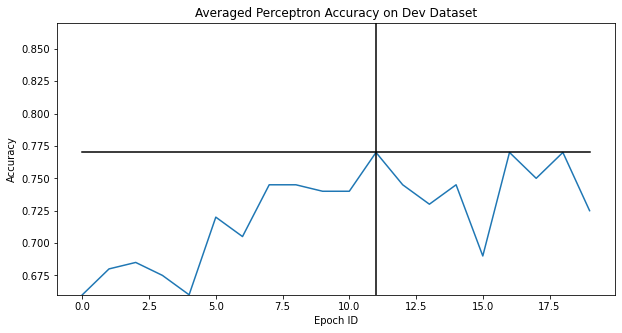

In [214]:
# Need to run the section above before running this block
dev_accs = np.array([acc for _, (acc, _) in train_acc_ls.items()])
x_accs = np.arange(epochs_b)
fig = plt.figure(figsize=[10, 5])

plt.plot(x_accs, dev_accs); plt.title("Averaged Perceptron Accuracy on Dev Dataset")
plt.xlabel("Epoch ID"); plt.ylabel("Accuracy")
plt.ylim([min(dev_accs), max(dev_accs)+0.1])
plt.plot(x_accs, np.ones_like(x_accs)*best_acc, 'k')
plt.plot(np.ones_like(x_accs)*best_idx, np.linspace(0.5, 1, epochs_b), 'k')
plt.show()

#### 5. Aggressive Perceptron with Margin

In [215]:
mu = [1, 0.1, 0.01]
hps = ul.get_hp_combs([0], mu).tolist() # hyperameter combinations

aggr_margin_update_func = Perceptron.update_aggr_margin_fnc # Aggressive Margin Perceptron.
lr_update_func = Perceptron.lr_opt_fnc # Use the optimization function for learning rate update

##### 5.a - Below is the FF-CV experiment for the Simple Perceptron.

In [218]:
cvv_stats, cvv_acc = ul.five_fold_CV(
    k_datasets, labels, hyperparams=hps, e=epochs_a, 
    update_fnc=aggr_margin_update_func, lr_fnc=lr_update_func
    )

print("Accuracy statistics from five-fold cross-validation:\n")
print("Margin 'mu' \t| five-fold mean | five-fold std")
for (r, mu), (mean, std) in cvv_stats.items():
    print(f"mu={mu}\t\t\t| {np.round(mean, 3)}\t\t | {np.round(std, 3)}")


Accuracy statistics from five-fold cross-validation:

Margin 'mu' 	| five-fold mean | five-fold std
mu=1.0			| 0.579		 | 0.048
mu=0.1			| 0.573		 | 0.067
mu=0.01			| 0.615		 | 0.034


Results: I ran the FF-CV experiment multiple times and mu=0.01 consistently had the best mean accuracies and lowest standard deviation. For the report, mean and std at mu=0.01 were 0.615 and 0.034 respectively.

##### 5.b - The cross-validation accuracy for the best hyperparameter 

Results: As stated above, the FF-CV accuracy for the best hyperparameters was 61.5%.

##### 5.c-5.e - The total number of updates the learning algorithm performs on the training set, etc

In [224]:
mu = 0.01
model = Perceptron(labels, update_fnc=aggr_margin_update_func, lr_fnc=lr_update_func)
update_count, train_acc_ls = model.train(data_train, epochs=epochs_b, mu=mu, dev_data=data_dev)

# Getting the classifier with the best accuracy.
(best_idx, (best_acc, best_classifier)) = max(train_acc_ls.items(), key=lambda x : x[1][0])
best_model = Perceptron(labels, model=(best_classifier, None))
best_test_acc = round(best_model.calc_acc(x_test, y_test),2)

print(f"5.c - The total number of updates performed by the aggressive margin perceptron at mu=0.01: {update_count}.")
print(f"5.d - The maximum accuracy on the dev dataset: {best_acc}. Obtained by classifier derived at epoch: {best_idx}.")
print(f"5.e - The test accuracy by the classifier w/ the best dev dataset performance was {best_test_acc}.")

5.c - The total number of updates performed by the aggressive margin perceptron at mu=0.01: 8451.
5.d - The maximum accuracy on the dev dataset: 0.785. Obtained by classifier derived at epoch: 18.
5.e - The test accuracy by the classifier w/ the best dev dataset performance was 0.73.


##### 5.f - Training Plot

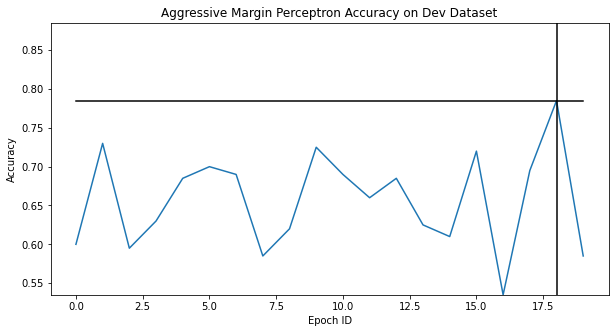

In [226]:
# Need to run the section above before running this block
dev_accs = np.array([acc for _, (acc, _) in train_acc_ls.items()])
x_accs = np.arange(epochs_b)
fig = plt.figure(figsize=[10, 5])

plt.plot(x_accs, dev_accs); plt.title("Aggressive Margin Perceptron Accuracy on Dev Dataset")
plt.xlabel("Epoch ID"); plt.ylabel("Accuracy")
plt.ylim([min(dev_accs), max(dev_accs)+0.1])
plt.plot(x_accs, np.ones_like(x_accs)*best_acc, 'k')
plt.plot(np.ones_like(x_accs)*best_idx, np.linspace(0.5, 1, epochs_b), 'k')
plt.show()

### 4.4 - End of Report Questions

#### 1. Briefly describe the design decisions that you have made in your implementation. (E.g, what programming language, how do you represent the vectors, etc.)

Response: The perceptron was abstracted and is described by the 'Perceptron' class in 'perceptron.py'. I wanted to use the same functions for batch training so I simply created different update functions depending on the perceptron. I have three update functions for the three different types of perceptrons: simple, margin, and aggressive margin update functions. A similar strategy was used to allow for the two different learning rate functionalities (decaying lr and optimized lr). The classifier parameters were stored in one vector, so $\textbf{w} = [w_0 \; w_1 \; \dots \; w_n]^T$ (same thing for the averaged perceptron parameters). Numpy arrays were used when possible to vectorize computations, which helped reduce run-times. A new instance of a 'Perceptron' can be created from an already trained model by passing the parameter vector to the constructor which faciliated parts c-f for every variant. My implementation uses python boolean values to represent the labels and a dictionary to derive the corresponding sign value when checking for errors. I created additional useful tools/functions in utils.py (Five-Fold CV and some useful data functions) to both reduce the complexity of my project and facilitate modularization.

#### 2. Consider a classifier that always predicts the most frequent label. What is its accuracy on test and development set?

In [241]:
test_com = ul.get_common_label(y_test)
test_pred = np.zeros_like(y_test) + int(test_com)

dev_com = ul.get_common_label(y_dev)
dev_pred = np.zeros_like(y_dev) + int(dev_com)
print(f"Accuracy of classifier on test dataset that predicts the most frequent label '{labels[test_com]}': {ul.calc_acc(test_pred, y_test)}.")
print(f"Accuracy of classifier on dev dataset that predicts the most frequent label '{labels[dev_com]}': {ul.calc_acc(dev_pred, y_dev)}.")

Accuracy of classifier on test dataset that predicts the most frequent label '1': 0.5223880597014925
Accuracy of classifier on dev dataset that predicts the most frequent label '1': 0.56


Discussion: All my classifier implemenations performed better than the baseline classifier. Thus, my implementation is better than just randomly guessing or predicting the most common label in a given dataset. However, I believe my implementation could drastically improve if feature normalization was conducted on the feature-sets since I observed that some features were scaled either considerably larger or smaller than other features.